1. Importing libraries 

In [193]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings, os
warnings.filterwarnings('ignore')

In [194]:
import my_eda_functions
import importlib
importlib.reload(my_eda_functions)

<module 'my_eda_functions' from '/Users/abhisheksaurav/Desktop/real_estate_project/notebooks/my_eda_functions.py'>

2. Reading the data 

In [195]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [196]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [197]:
data = get_data("gurgaon_properties_cleaned_v2")

In [198]:
data = data.drop_duplicates()

1. Price vs property_type

property type
flat     1.380
house    3.575
Name: price, dtype: float64
Summary of property type vs price
                count      mean       std   min    25%    50%     75%   max
property type                                                              
flat           2868.0  1.708560  1.387176  0.16  0.900  1.380  2.0425  15.0
house           926.0  4.906868  4.670685  0.07  1.185  3.575  7.0000  31.5


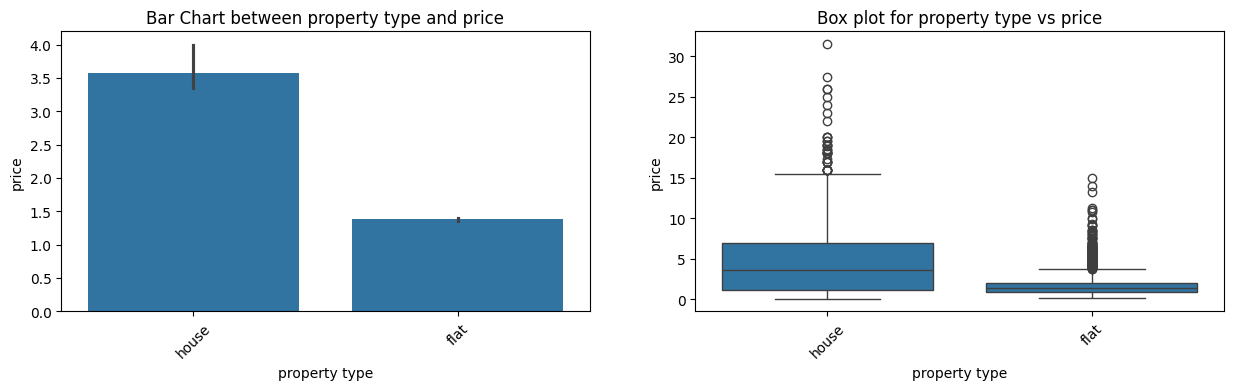

In [199]:
my_eda_functions.cat_num_bivar(data, 'property type', 'price')

Observations: 
1. Median price of houses are around 3.5 crores and flats are 1.3 crores. 
2. Box plot indicated that the prices of houses are in wider range than the flats. 
3. House prices are in the range of 0 to around 15 crores whereas flat prices are around 0 to 5 crores. 
4. Least price of a flat is 16 lakhs where as the maximum flat price is 15 crores 
5. Least price of a house is 7 lakhs where as maximum house price is 31 crores. 
6. 25% of the flats are priced below 90 lakhs whereas for house it's around 1.2 crores. 
7. 50% of the flats are priced below 1.4 crores whereas for house it's around 3.5 crores 
8. 75% of the flats are priced below 2 crores whereas for house it's 7 crores. 

2. property type vs area 

2.1 Super_built_up_area 

property type
flat     1623.5
house    1557.0
Name: built_up_area, dtype: float64
Summary of property type vs built_up_area
               count         mean           std   min        25%     50%  \
property type                                                              
flat           900.0  2530.379743  24525.549530  97.0  1275.8825  1623.5   
house          885.0  2111.867638   2084.990937   2.0   558.0000  1557.0   

                  75%       max  
property type                    
flat           2000.0  737147.0  
house          3000.0   26000.0  


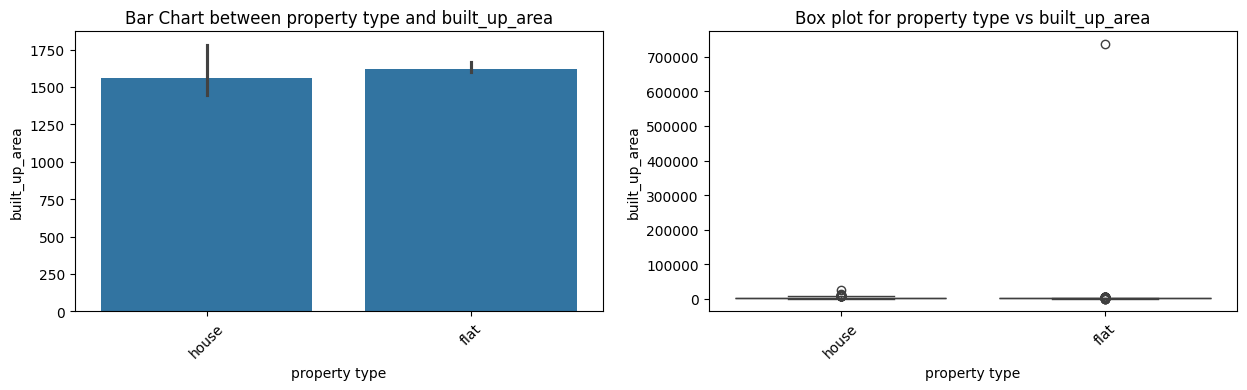

In [200]:
my_eda_functions.cat_num_bivar(data, 'property type', 'built_up_area')

In [201]:
data = data[data['built_up_area'] != 737147.0]

property type
flat     1622.0
house    1557.0
Name: built_up_area, dtype: float64
Summary of property type vs built_up_area
               count         mean          std   min       25%     50%  \
property type                                                            
flat           899.0  1713.231111   737.893725  97.0  1275.765  1622.0   
house          885.0  2111.867638  2084.990937   2.0   558.000  1557.0   

                  75%      max  
property type                   
flat           2000.0   5350.0  
house          3000.0  26000.0  


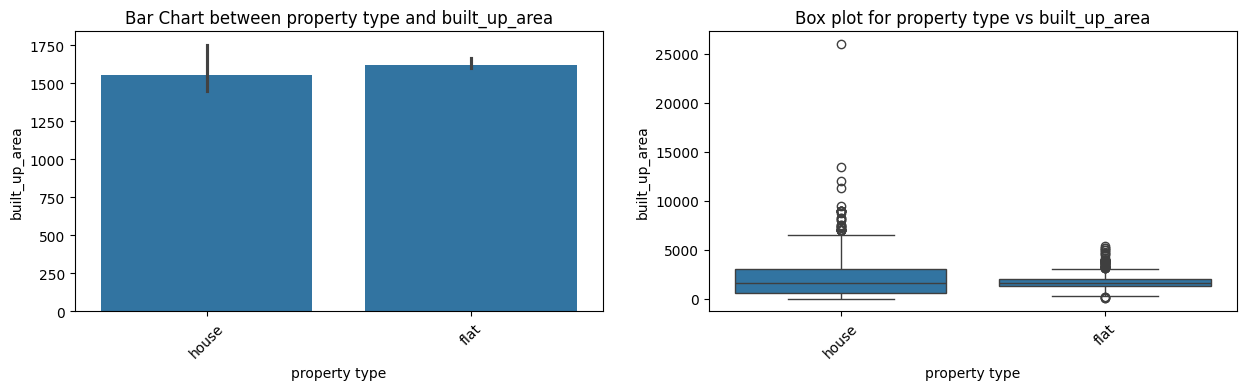

In [202]:
my_eda_functions.cat_num_bivar(data, 'property type', 'built_up_area')

Observation
1. built up area of flats are little higher in comparison to the houses, which is not generally true.
2. median buit up area of flats are around 1622 square feet where as for house it's 1557 square feet. 
3. Box plot is not able to generate any useful information due to the presence of outliers. 
4. Least buit up area of flats is 97.0 square feet where as the maximum flat built up area is now 5350.0 square feet which indicates the presence of outliers on both ends. 
5. Least buit up area of a house is 2.0 square feets where as maximum built up area of a house is 26000. 
6. 25% of the flats's buit up area is below 1275.8825 square feet whereas for house it's around 558 square feet. 
7. 50% of the flats's buit up area is below 1623.5 square feet whereas for house it's around 1557.0 square feet 
8. 75% of the flats's buit up area is below 2000.0 square feet whereas for house it's 3000.0 square feet. 
9. Removed the single outlier present for the built up area of flat due to which box plot was not usable. 
10. House's built up area in larger range than the flat's built up area. 

3. property type vs price_per_sq_ft

property type
flat      8333.0
house    19178.0
Name: price_per_sq_ft, dtype: float64
Summary of property type vs price_per_sq_ft
                count          mean           std  min      25%      50%  \
property type                                                              
flat           2867.0   9323.483781   5581.977049  5.0   6491.0   8333.0   
house           926.0  28075.284017  42348.528955  2.0  10079.0  19178.0   

                    75%       max  
property type                      
flat           11058.00  200000.0  
house          30349.75  600000.0  


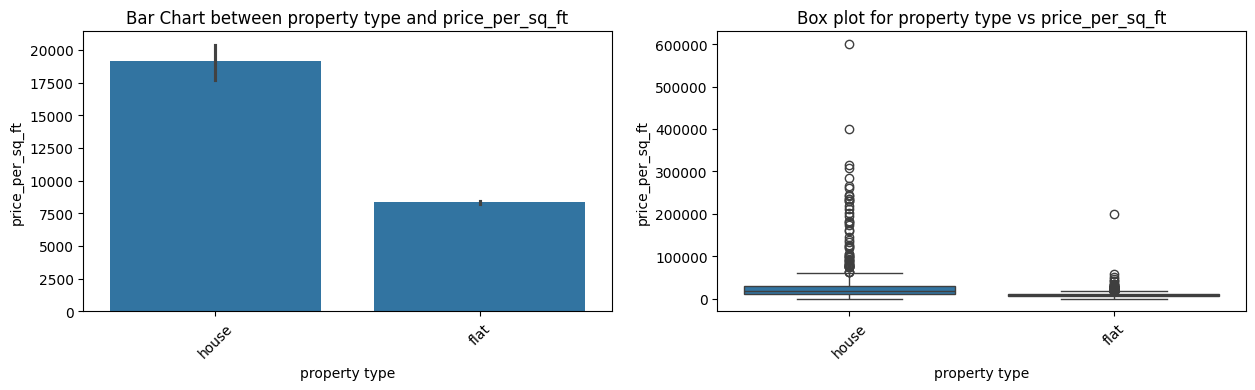

In [203]:
my_eda_functions.cat_num_bivar(data, "property type", "price_per_sq_ft")

In [204]:
# checking for outliers 

data[data['price_per_sq_ft'] > 100000].shape

(33, 23)

In [205]:
(
    data[data['price_per_sq_ft'] > 200000]
    .sample(3)
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
699,house,ansal,sector 8,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,...,NaN,60.0,NaN,0,0,0,0,0,0,53
3450,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,NaN,359.0,NaN,1,1,0,0,0,2,102
826,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,No,...,NaN,270.0,NaN,0,0,0,0,0,0,46


Observation. 
1. houses are on an average priced around 20000 rupees square feet whereas flats are priced around 8000 rupees per square feet. 
2. Rate of house per square feet is little high on the higher end which indicates the presence of an anamoly there where as flat's is reasonable. 
3. There is a single house which has price per square feet above 600000 per square feet which is clearly an outliers, i will perform further analysis for the reason behind this. 
4. Instead of removing this column i will try to fix these anamollies. 

4. property type vs bedRoom

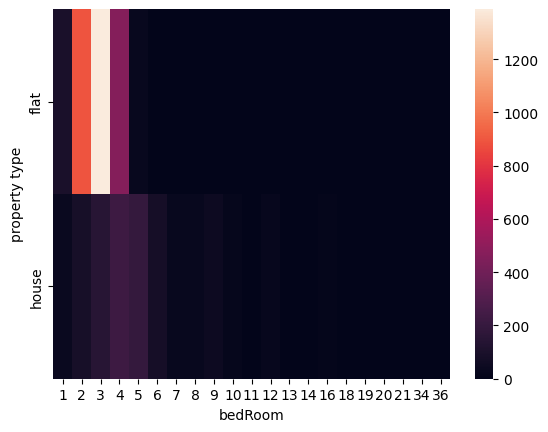

In [206]:
sns.heatmap(pd.crosstab(data['property type'], data['bedRoom']))
plt.show()

Observations: 

1. Flats with 2, 3, 4 bed rooms are most common where as for houses 4 and 5 bedrooms are common. 

In [207]:
# outlier analysis 

data[data['bedRoom'] > 10].shape

(53, 23)

- There are 53 properties with more than 10 bedrooms. 
- upon initial inspection of the data it's found that thesse are not outliers but data errors. 

5. property type vs floor num

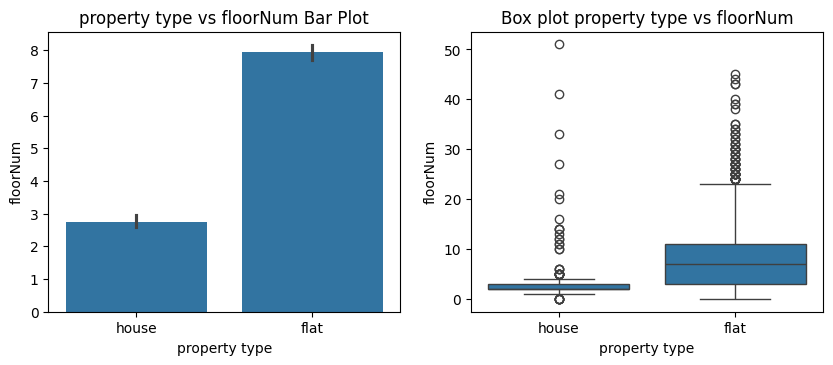

In [208]:
my_eda_functions.cat_cat_bivar(data, 'property type', 'floorNum')

In [209]:
# outlier analysis 

data[(data['property type'] == 'house') & (data['floorNum'] > 10)].sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2713,house,dlf the arbour,sector 63,8.50,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,...,NaN,3950.0,NaN,0,0,0,0,0,0,61
2232,house,spaze privy,sector 72,3.09,6981.0,4426.0,Built Up area: 3653 (339.37 sq.m.)Carpet area:...,5,5,3+,...,NaN,3653.0,2922.0,0,1,0,0,0,2,33
1086,house,ireo victory valley,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,...,NaN,3600.0,NaN,1,1,0,1,0,2,49


Observations: 
1. Houses are mostly around 3 floors and flats are around 8 floors. Which is valid becasue independent houses are usually not high rise buildings and flats are usually on the multi storey buildings. 
2. Upon further analysis it's been observed that these houses are actually penthouses which are usually located on the top floors of the apartments buildings. 
3. These are expensive properties built on top of the apartments. 


6. property_type vs agePossession

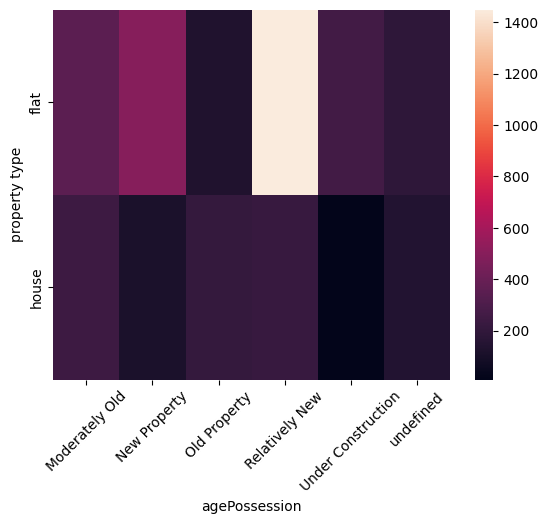

In [210]:
sns.heatmap(pd.crosstab(data['property type'], data['agePossession']))
plt.xticks(rotation = 45)
plt.show()

Observation
1. `Relatively new` properties are higher in the flats in comparison to the houses. 
2. houses are mostly relatively old. 
3. So we can conclude that the new properties which are being built in gurgaon are mostly  flats in comparison to the houses. 

property type vs agePossession - average prices

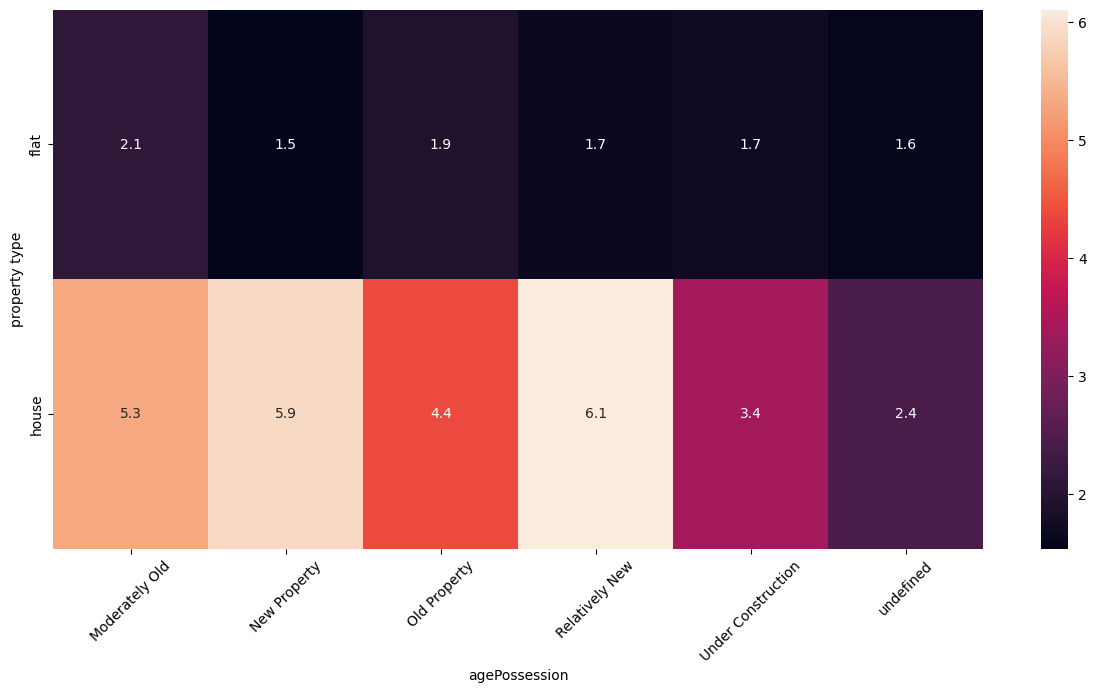

In [211]:
plt.figure(figsize= (15, 7))
sns.heatmap(pd.pivot_table(data,
               index= 'property type', 
               columns= 'agePossession', 
               values = 'price', 
               aggfunc= 'mean'), annot= True)
plt.xticks(rotation = 45)
plt.show()

Observation
1. For all categories prices of houses are higher than the flats. 
2. If we look at the price individually: 
    - For Moderately old properties: 
        - flats - 2.1 crores
        - houses - 5.3 crores
    - For New Property 
        - flats - 1.5 crores
        - houses - 5.9 crores 
    - For Old Property
        - flats - 1.9 crores 
        - houses - 4.4 crores 
    - For Relatively new property 
        - flats - 1.7 crores 
        - houses - 6.1 crores 
    - For under construcion 
        - flats - 1.7 crores 
        - houses - 3.4 crores 
    - For undefined 
        - flats - 1.6 crores 
        - houses - 2.4 crores

3. From here we can conclude that right now budget flats are under construction in gurgaon.  
4. For houses we can conclude that older the house gets lower the price 


7. property type vs bedRoom vs prices

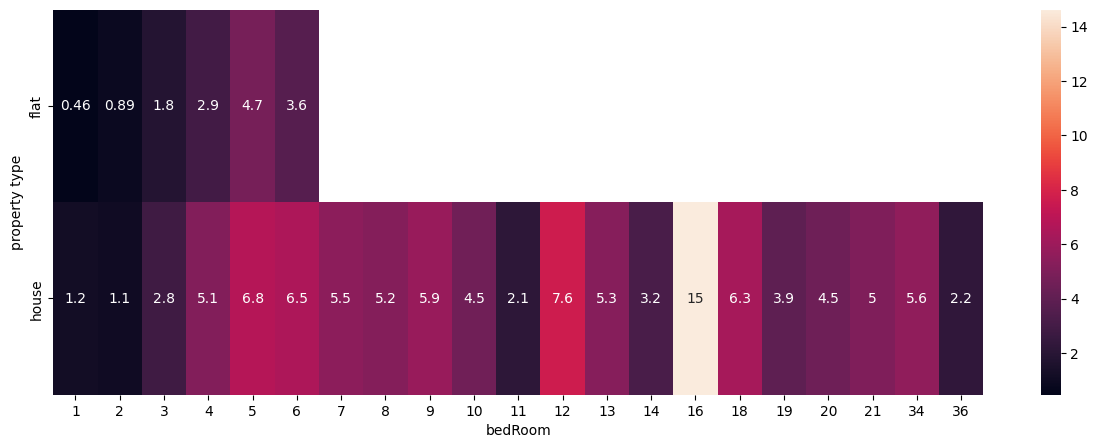

In [212]:

plt.figure(figsize= (15, 5))
sns.heatmap(pd.pivot_table(data, 
               index= 'property type', 
               columns= 'bedRoom', 
               values = 'price', 
               aggfunc= 'mean'),annot= True)
plt.show()

Observation
1. So the flat prices are increasing with the increase in the number of bedRooms except one anamoly where the 6 bedroom flats are less expensive than the 5 bedroom flats. 
2. Similaryly houses with 16 bedroom is significantly higher than other houses. 
3. For houses also the prices are increasing with the number of rooms but there are some analmolies in between which may be possible due to some data errors. 

8. property type vs furnishing type

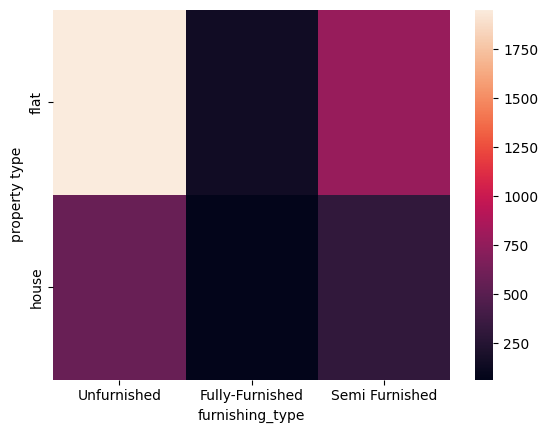

In [213]:
sns.heatmap(pd.crosstab(data['property type'], data['furnishing_type']))
plt.xticks(ticks = [0.5, 1.5, 2.5], labels=["Unfurnished", "Fully-Furnished", "Semi Furnished"])
plt.show()

Observation. 
1. Most of the flats are unfurnished, then fully furnished and unfurnished. 

9. property type vs furninshing type vs price

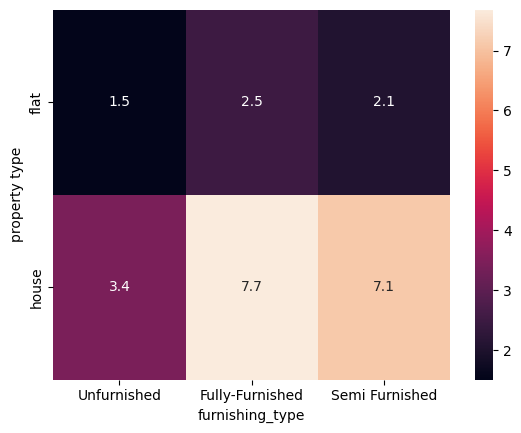

In [214]:
sns.heatmap(pd.pivot_table(data, 
               index= 'property type', 
               columns= 'furnishing_type', 
               values = 'price', 
               aggfunc= 'mean'), annot= True)
plt.xticks(ticks = [0.5, 1.5, 2.5], labels=["Unfurnished", "Fully-Furnished", "Semi Furnished"])
plt.show()

Observation
- Prices of house and flats are lower for unfurnished. 
- Prices are little higher for the semi furnished 
- Prices are highest for fully furnished. 
- these are valid also as the furnishing cost adds up to the price of the flats. 

10. property type vs luxary score 

property type
flat     66.0
house    29.0
Name: luxary_score, dtype: float64
Summary of property type vs luxary_score
                count       mean        std  min   25%   50%     75%    max
property type                                                              
flat           2868.0  77.930614  52.222884  0.0  42.0  66.0  117.00  174.0
house           944.0  45.260593  48.729325  0.0   0.0  29.0   72.25  160.0


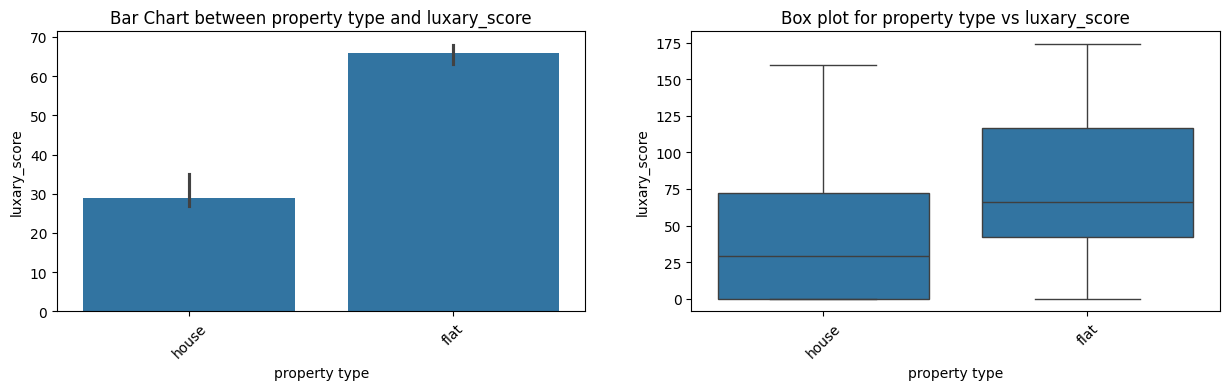

In [215]:
my_eda_functions.cat_num_bivar(data, "property type", "luxary_score")

Observation.
1. Flats have higher luxary score in comparison to the house which is valid as well because many amneties are present in the apartments than the independent hosues like swimming pool, gold course etc. 
2.  Box plot revels that there are no outliers in the data. 
3. houses have luxary score in the lower range which ranges from to 0 - 75 whereas for the flats mostly the luxary score stands in between 50-125. 

11. sector analysis

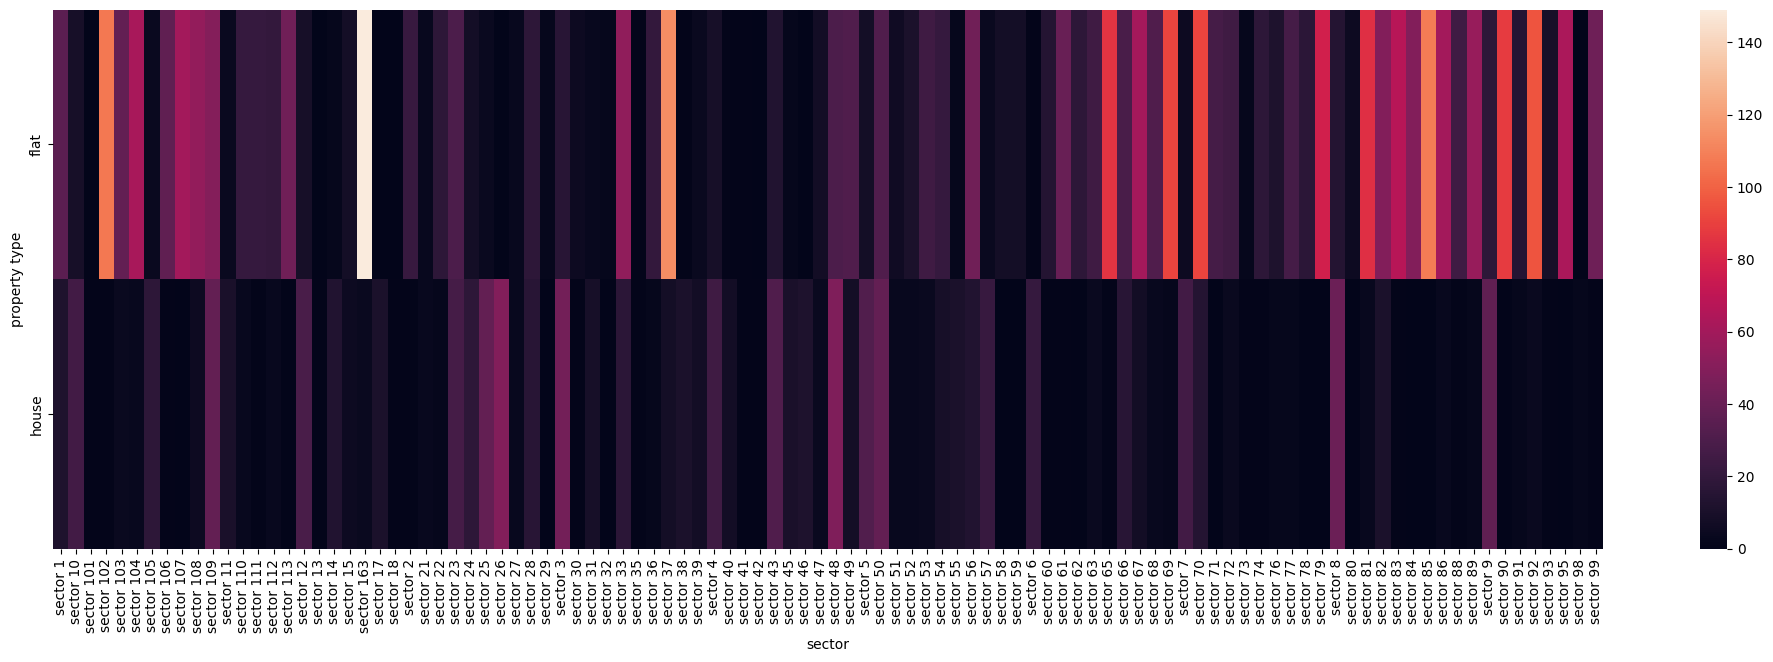

In [216]:
plt.figure(figsize = (25, 7))
sns.heatmap(pd.crosstab(data['property type'], data['sector']).sort_index())
plt.show()

Observation

1. Based on the gurgaon domain knowledge, we can say that after sector 70 they are relatively new ares which are under development and the flats are mostly avaialbel in thsoe areas only. 

2. The areas which are relatively older have more number of houses than the new areas. 

3. In a nutshell, we can say that in the relatively newer areas of gurgaon we will see more flats but if we move to the older areas of gurgaon we will see the houses. 


11. Average price of flats and houses in every sector

In [217]:
# sector analysis

import re 

average_price_per_sector = (
    data 
    .groupby('sector')['price'].mean().reset_index()
)

average_price_per_sector

,sector,price
0,sector 1,1.539787
1,sector 10,1.415714
2,sector 101,0.750000
3,sector 102,1.687407
4,sector 103,1.495000
...,...,...
97,sector 92,0.930000
98,sector 93,0.848889
99,sector 95,0.462381
100,sector 98,3.325000


In [218]:
def extract_sector_number(sector_name):
    match = re.search(r"\d+", sector_name)
    if match: 
        return int(match.group())
    else:
        return float('inf')
    


In [219]:
average_price_per_sector['sector_number'] = (
    average_price_per_sector['sector']
    .apply(extract_sector_number)
)

In [220]:
average_price_per_sector_sorted_by_sector = (
    average_price_per_sector
    .sort_values(by = 'sector_number')
)

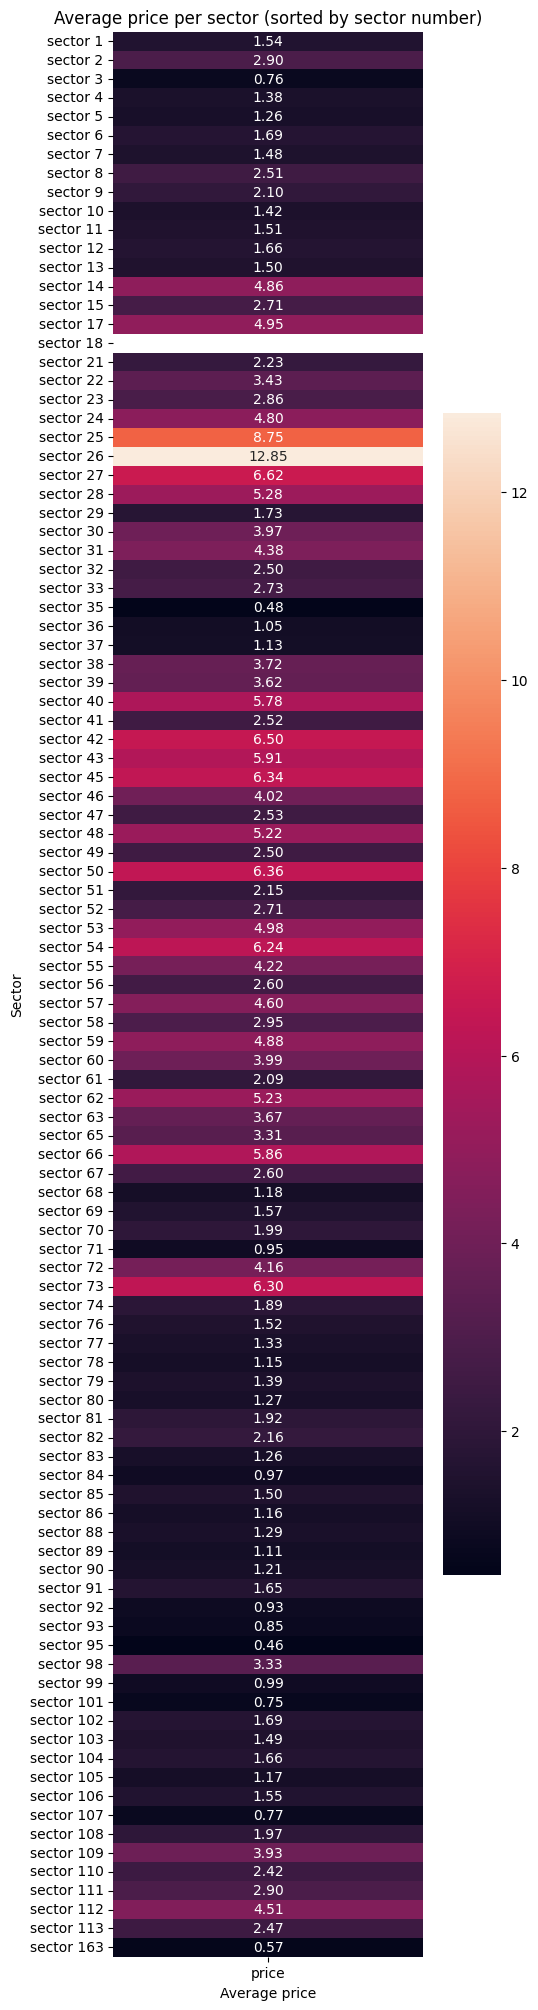

In [221]:
plt.figure(figsize= (5, 25))
sns.heatmap(
    average_price_per_sector_sorted_by_sector
    .set_index('sector')[['price']], 
    annot= True, 
    fmt= '.2f'
)
plt.title("Average price per sector (sorted by sector number)")
plt.xlabel("Average price")
plt.ylabel("Sector")
plt.show()

Observation: 

1. Sector 25, 26, 27 are relatively more expensive than the other sectors because these are most posh area which comes under DLF which is a prominent real estate company. These areas are considered as a heart of gurgaon and that's why the properties are expensive in comparison to the other areas. 

2. Properties in sector from 1 to 10 is considered as old gurgaon and that's why proeprties are less expensive in comparison to the other areas of gurgaon. 

3. If we look at the sectors beyond 100, those areas are under development and that's why the price of properties in these area ares are less expensive than the others. 

4. Even in some newer areas the prices of the properties are higher, like sector 109 to 112 and that's so because national highway is closer to that area which significantly impacts the prices of the properties. 

In [222]:
average_price_per_sector

,sector,price,sector_number
0,sector 1,1.539787,1
1,sector 10,1.415714,10
2,sector 101,0.750000,101
3,sector 102,1.687407,102
4,sector 103,1.495000,103
...,...,...,...
97,sector 92,0.930000,92
98,sector 93,0.848889,93
99,sector 95,0.462381,95
100,sector 98,3.325000,98


12. Average price_per_square_ft per sector

In [223]:
average_price_per_sq_ft_per_sector = (
    data.groupby('sector')[['price_per_sq_ft']].mean().reset_index()
)

average_price_per_sq_ft_per_sector

,sector,price_per_sq_ft
0,sector 1,11884.617021
1,sector 10,19278.000000
2,sector 101,138888.000000
3,sector 102,10595.555556
4,sector 103,7445.476190
...,...,...
97,sector 92,5925.200000
98,sector 93,8010.555556
99,sector 95,5001.238095
100,sector 98,13683.000000


In [224]:
average_price_per_sq_ft_per_sector['sector_number'] = (
    average_price_per_sq_ft_per_sector['sector']
    .apply(extract_sector_number)
)

In [225]:
average_price_per_sq_ft_per_sector_sorted_by_sector = (
    average_price_per_sq_ft_per_sector
    .sort_values(by = 'sector_number')
)

average_price_per_sq_ft_per_sector_sorted_by_sector

,sector,price_per_sq_ft,sector_number
0,sector 1,11884.617021,1
23,sector 2,9226.782609,2
33,sector 3,13629.559322,3
43,sector 4,18947.029412,4
53,sector 5,12130.282051,5
...,...,...,...
12,sector 110,9680.625000,110
13,sector 111,11692.227273,111
14,sector 112,12366.478261,112
15,sector 113,12515.720930,113


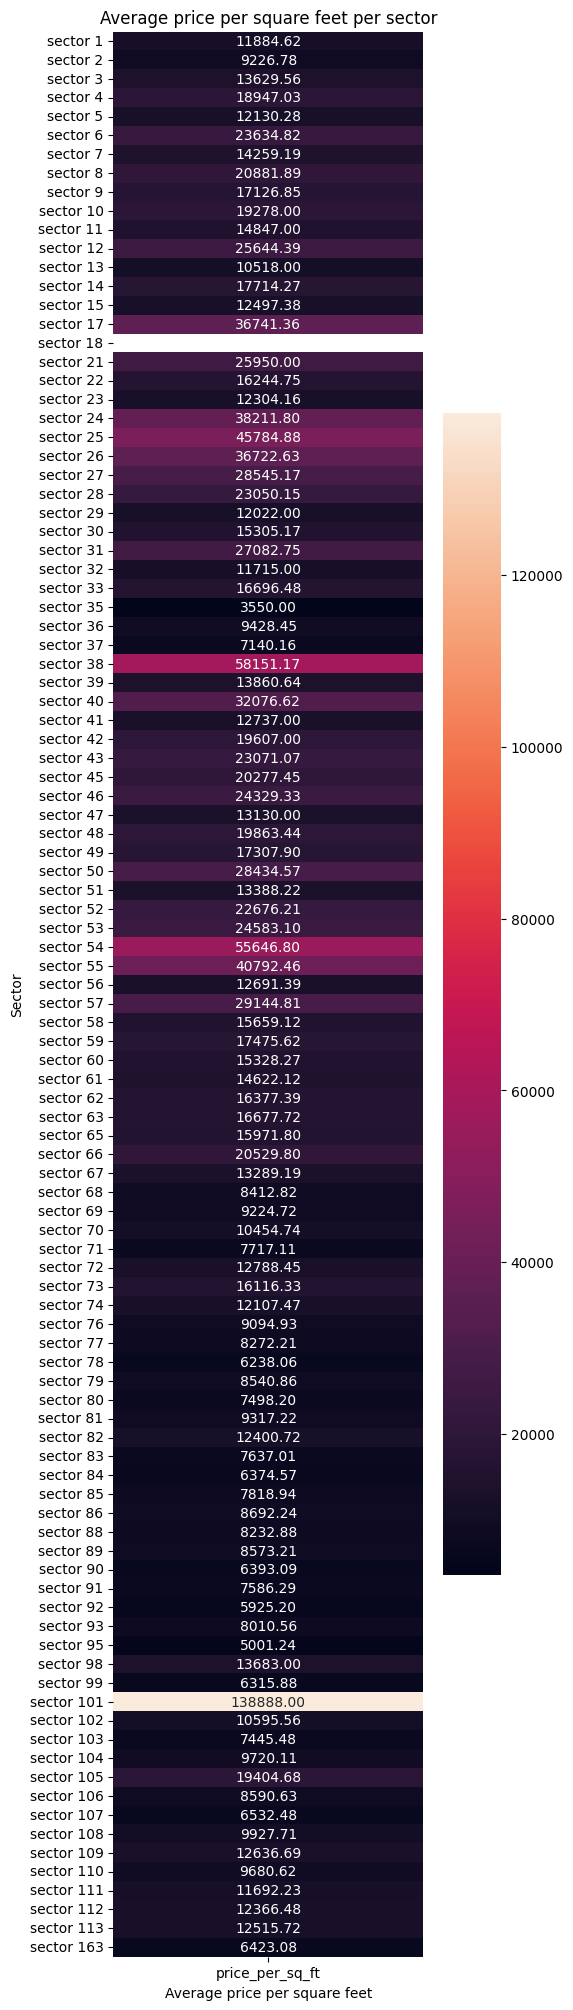

In [226]:
plt.figure(figsize=(5, 25))
sns.heatmap(
    average_price_per_sq_ft_per_sector_sorted_by_sector
    .set_index('sector')[['price_per_sq_ft']], 
    annot= True, 
    fmt= ".2f"
)
plt.title("Average price per square feet per sector")
plt.xlabel("Average price per square feet")
plt.ylabel("Sector")
plt.show()

Observation

1. Here we are observing similar pattern like the price of the average price of the properties per sector. 
2. Sectors which are new and under developed has lower price per square feet. 
3. Old gurgaon area have also lower price per square feet. 


13. Luxary score for every sector 

In [227]:
average_luxary_score_per_sector = (
    data.groupby('sector')['luxary_score']
    .mean()
    .reset_index()
)

average_luxary_score_per_sector

,sector,luxary_score
0,sector 1,28.978723
1,sector 10,20.942857
2,sector 101,0.000000
3,sector 102,93.879630
4,sector 103,77.690476
...,...,...
97,sector 92,52.370000
98,sector 93,41.500000
99,sector 95,41.587302
100,sector 98,160.000000


In [228]:
# extracting sector numbers 

average_luxary_score_per_sector['sector_number'] = (
    average_luxary_score_per_sector['sector']
    .apply(extract_sector_number)
)

average_luxary_score_per_sector

,sector,luxary_score,sector_number
0,sector 1,28.978723,1
1,sector 10,20.942857,10
2,sector 101,0.000000,101
3,sector 102,93.879630,102
4,sector 103,77.690476,103
...,...,...,...
97,sector 92,52.370000,92
98,sector 93,41.500000,93
99,sector 95,41.587302,95
100,sector 98,160.000000,98


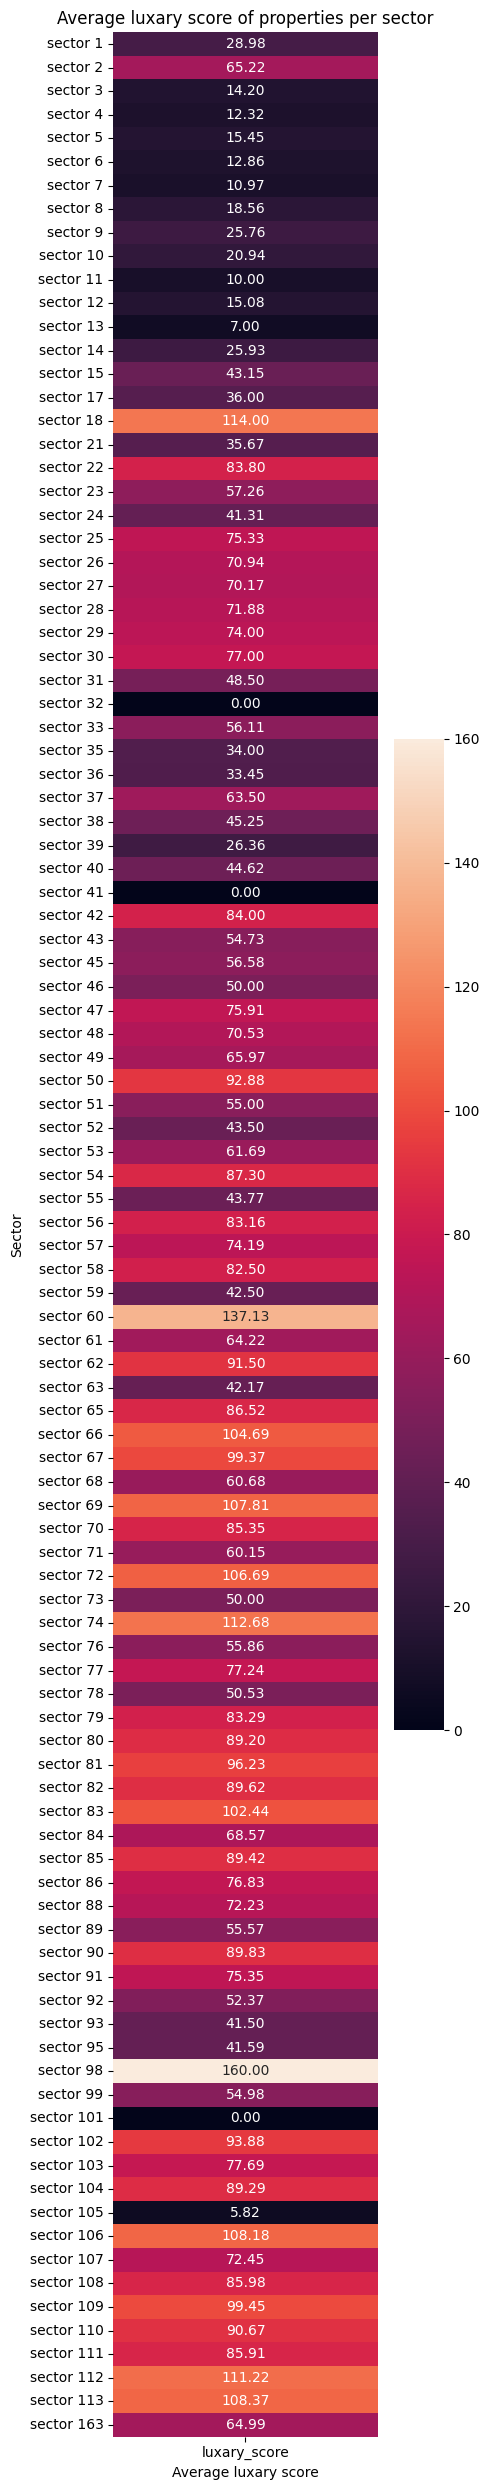

In [229]:
# plotting the heatmap to get the average luxary score per sector 

average_luxary_score_per_sector_sorted_by_sector = (
    average_luxary_score_per_sector
    .sort_values(by = 'sector_number')
)


plt.figure(figsize= (5, 25))
sns.heatmap(
    average_luxary_score_per_sector_sorted_by_sector
    .set_index('sector')[['luxary_score']], 
    annot= True, 
    fmt= '.2f'

)

plt.title("Average luxary score of properties per sector")
plt.xlabel("Average luxary score")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

Observation

1. New sectors have high luxary score than the old sectors which indicates that the in the newly developed area or in areas under development there are luxarious properties. 

14. Price

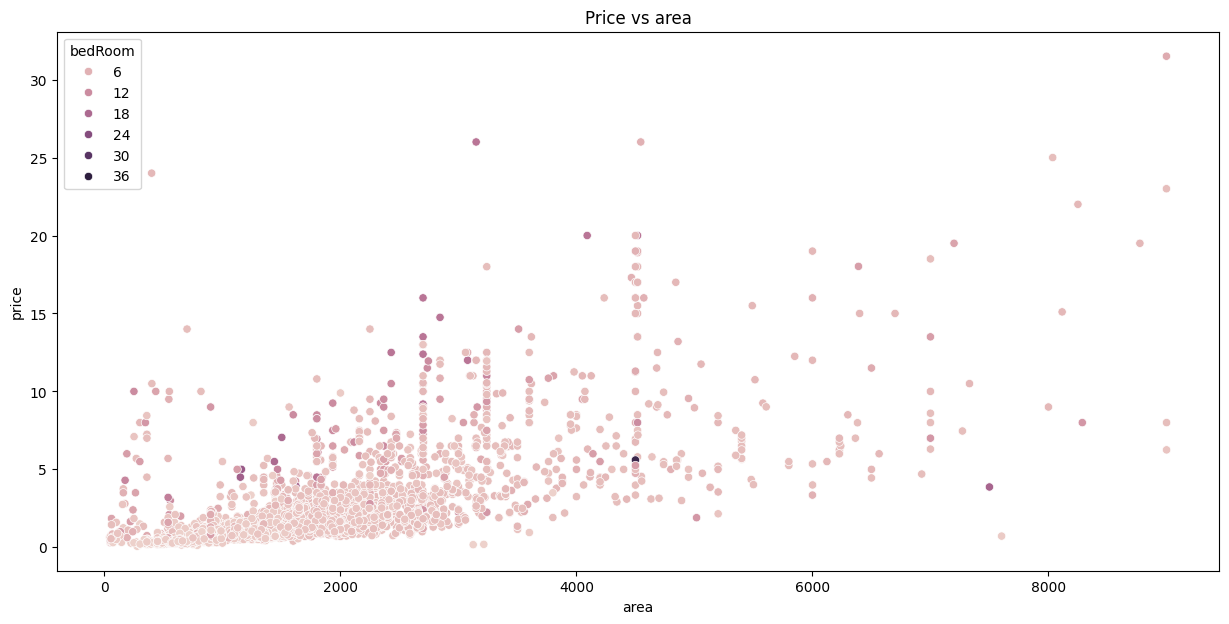

In [230]:
# price vs area with number of bedrooms

plt.figure(figsize = (15, 7))
sns.scatterplot(data= data[data.area < 10000], x= 'area', y = 'price', hue= 'bedRoom')
plt.title("Price vs area")
plt.show()

Observation

1. Scatter plot between the price and area validates the previous findings that with the increase in the area of the property the price of the property is increasing. 

2. There is a linear like relationship between the price and area. 

3. The darker shades of the data points represents the higher number of bedrooms. The properties which are expensive tends to have higher number of bedrooms. 


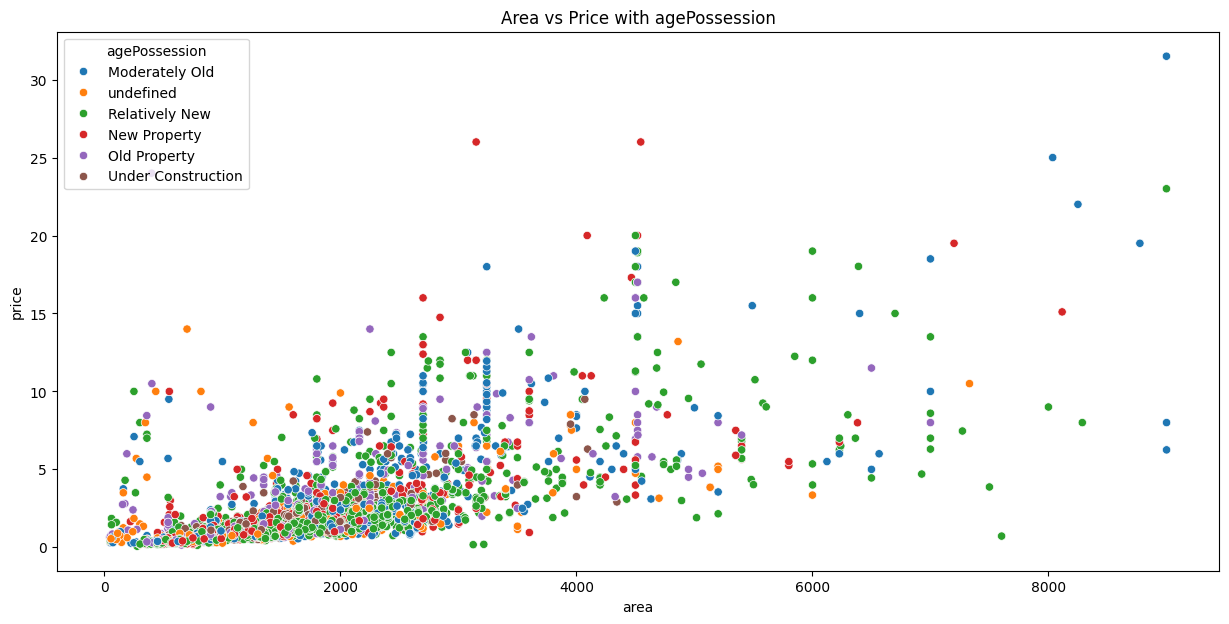

In [231]:
# price vs area with the age of the property

plt.figure(figsize= (15, 7))
sns.scatterplot(data = data[data['area'] < 10000], x = 'area', y = 'price', hue = 'agePossession')
plt.title("Area vs Price with agePossession")
plt.show()

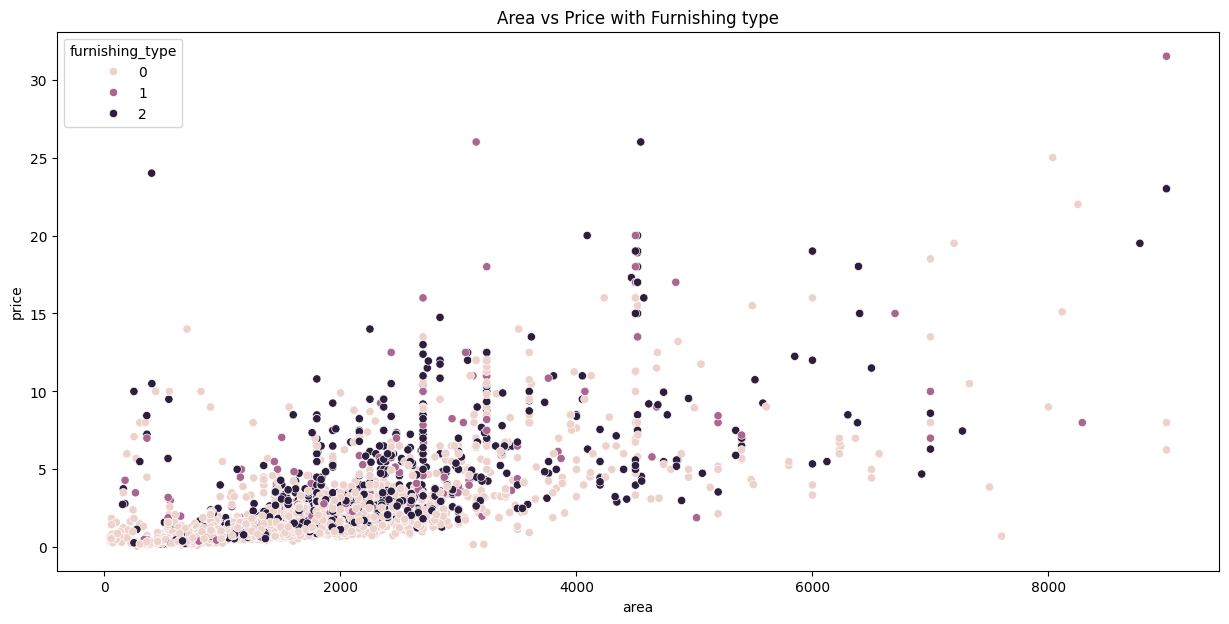

In [232]:
# area vs price with furnishing type 

plt.figure(figsize= (15, 7))
sns.scatterplot(
    data = data[data.area < 10000], 
    x = 'area', 
    y = 'price', 
    hue = 'furnishing_type'
    )
plt.title("Area vs Price with Furnishing type")
plt.show()

Observation

1. Ligther shade of bubbles are for the unfurnished types which indicates that the most of the flats are unfurnished in the lower price range. 

2. Properties with higher area and price have more possibility of have semi furnished and fully furnished. 



bedRoom
1      0.400
2      0.805
3      1.600
4      2.665
5      5.550
6      4.500
7      3.500
8      4.425
9      5.400
10     2.800
11     2.125
12     8.250
13     4.650
14     3.200
16    13.500
18     6.275
19     3.900
20     4.500
21     5.000
34     5.600
36     2.250
Name: price, dtype: float64
Summary of bedRoom vs price
          count       mean       std   min      25%     50%      75%    max
bedRoom                                                                    
1         134.0   0.655149  0.759536  0.07   0.2600   0.400   0.7000   5.50
2         974.0   0.904733  0.623868  0.15   0.5000   0.805   1.1500   9.90
3        1530.0   1.934451  1.273709  0.35   1.2000   1.600   2.2900  13.00
4         684.0   3.665058  2.958497  0.37   1.7500   2.665   4.9925  25.00
5         212.0   6.536132  5.031468  0.32   2.2875   5.550  10.0000  24.00
6          81.0   6.448765  6.022086  0.30   2.3000   4.500   8.0000  27.50
7          30.0   5.452000  6.457146  0.40   1.2750   3

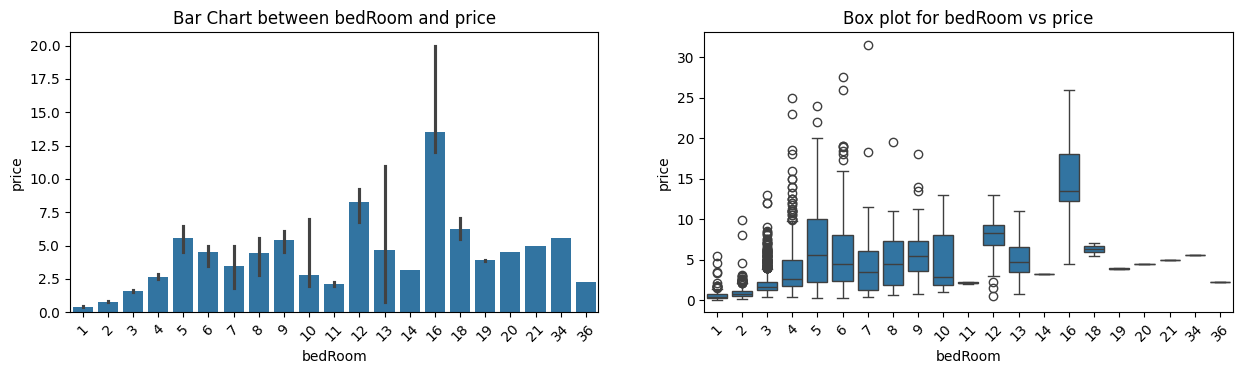

In [233]:
# price vs bedroom 

my_eda_functions.cat_num_bivar(data, 'bedRoom', 'price')

Observation

1. As the number of bedrooms is increasing the price of the flat is also increasing. 

2. There is some fluctuation in the prices of properties with higher bedrooms because there are very less properties which can be validated from the boxplot as well. 

agePossession
Moderately Old        1.990
New Property          1.400
Old Property          2.225
Relatively New        1.490
Under Construction    1.315
undefined             1.100
Name: price, dtype: float64
Summary of agePossession vs price
                     count      mean       std   min   25%    50%   75%   max
agePossession                                                                
Moderately Old       586.0  3.412389  3.733804  0.16  1.00  1.990  4.58  31.5
New Property         609.0  2.340608  3.104084  0.20  0.80  1.400  2.35  26.0
Old Property         336.0  3.419851  3.305123  0.15  1.25  2.225  4.60  24.0
Relatively New      1664.0  2.252626  2.653413  0.07  0.98  1.490  2.35  27.5
Under Construction   268.0  1.784440  1.420470  0.38  0.96  1.315  2.10   9.5
undefined            330.0  1.947879  2.341795  0.20  0.70  1.100  2.00  14.0


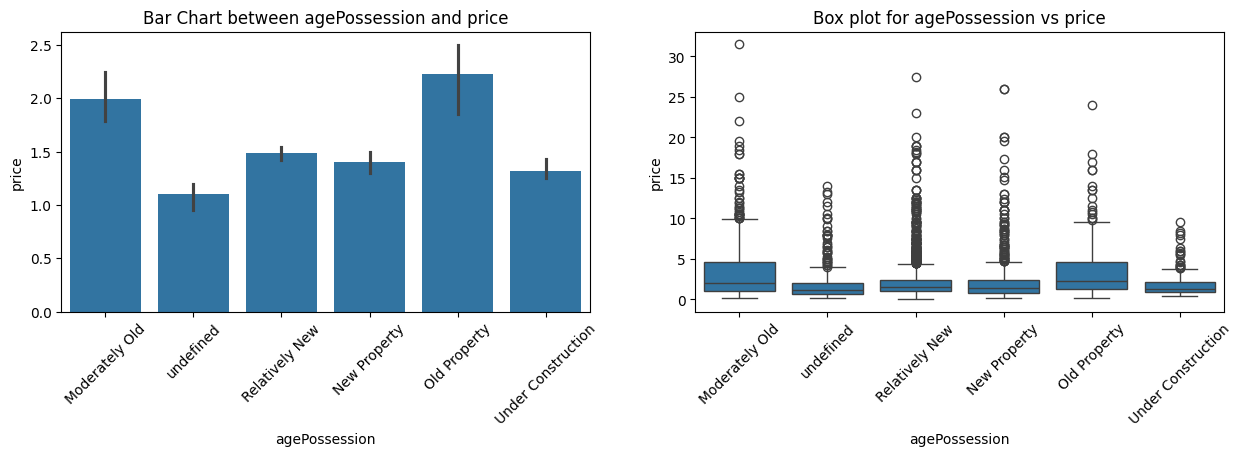

In [234]:
# agePossession vs price

my_eda_functions.cat_num_bivar(data, 'agePossession', 'price')

Observation

1. Old property tend to have higher prices in comparison to new properties because they are well established in those areas which are already settled and usually located at good areas with full services. 

2. New properties have high price because they are building luxarious properties with all amneties that's why they have high prices. 

furnishing_type
0    1.30
1    2.40
2    2.15
Name: price, dtype: float64
Summary of furnishing_type vs price
                  count      mean       std   min   25%   50%   75%   max
furnishing_type                                                          
0                2510.0  1.935394  2.222168  0.07  0.80  1.30  2.00  25.0
1                 207.0  4.038792  4.432818  0.22  1.57  2.40  4.79  31.5
2                1076.0  3.484842  3.619179  0.22  1.30  2.15  4.25  27.5


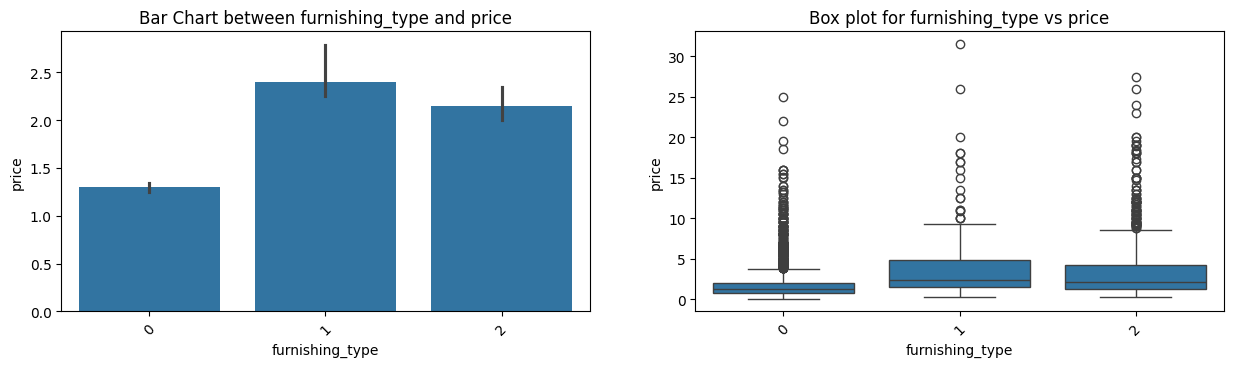

In [235]:
# furnishing type with price 

my_eda_functions.cat_num_bivar(data, 'furnishing_type', 'price')

Observation: 

1. 0 is the representation of unfurnished properties which have low prices. 
2. 2 represents the semi furnished properties which indicates the semi furnished houses are little more expensive than the unfurnished houses. 
3. 1 represents the fully furnished houses, which is the most expensive property. 
4. Average price of unfurnished properties is around 2 crores, for semi furnished it is 3.4 crores and fully furnished properties are around 4 crores. 


<Axes: xlabel='luxary_score', ylabel='price'>

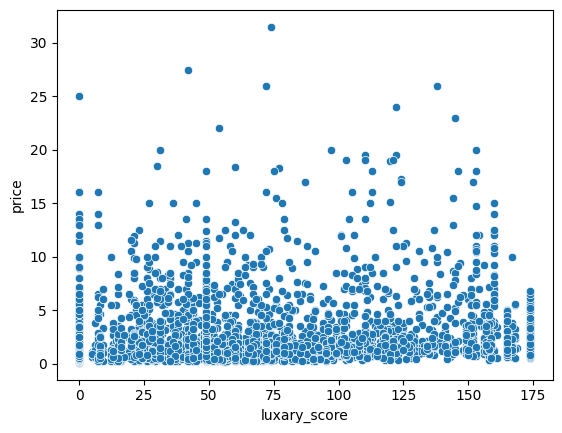

In [237]:
# luxary score with price 

sns.scatterplot(data, y = 'price', x = 'luxary_score')

Correlation between numerical columns 

Text(0.5, 1.0, 'Correlation heatmap')

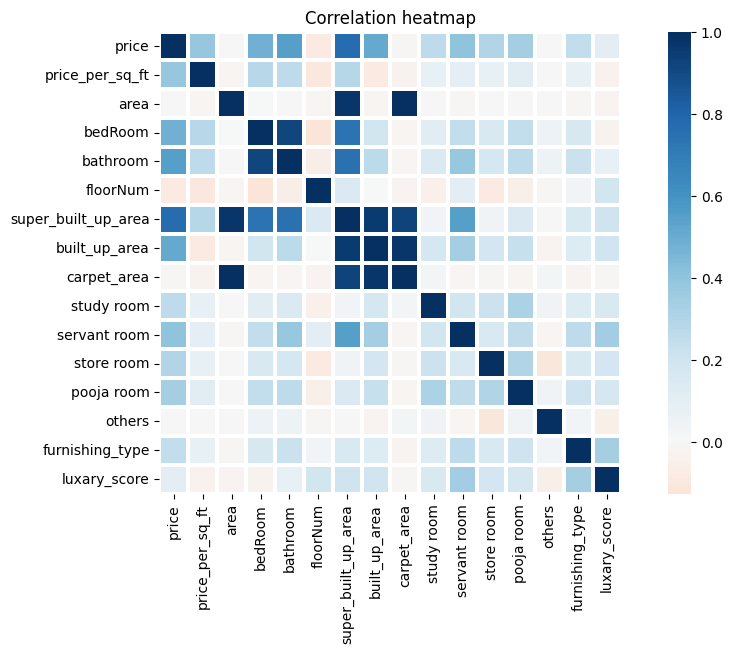

In [255]:
plt.figure(figsize= (12, 6))
sns.heatmap(
    data
    .corr(numeric_only= True), 
    #annot= True, 
    cmap= "RdBu", 
    square= True, 
    linewidths= 1.5, 
    center= 0
    
    )
plt.title("Correlation heatmap")

dependency of price on various columns

In [258]:
data.corr(numeric_only= True)['price'].sort_values(ascending= False)

price                  1.000000
super_built_up_area    0.770083
bathroom               0.553894
built_up_area          0.510788
bedRoom                0.482610
servant room           0.403981
price_per_sq_ft        0.385558
pooja room             0.338594
store room             0.303262
study room             0.258764
furnishing_type        0.246218
luxary_score           0.109738
area                  -0.000187
others                -0.005513
carpet_area           -0.010458
floorNum              -0.085811
Name: price, dtype: float64

Observation
1. Price is higly correlated witht he super built up area, number of bathroom, built up area and number of bedrooms. 
2. Avalability of servent room is an important aspect. 

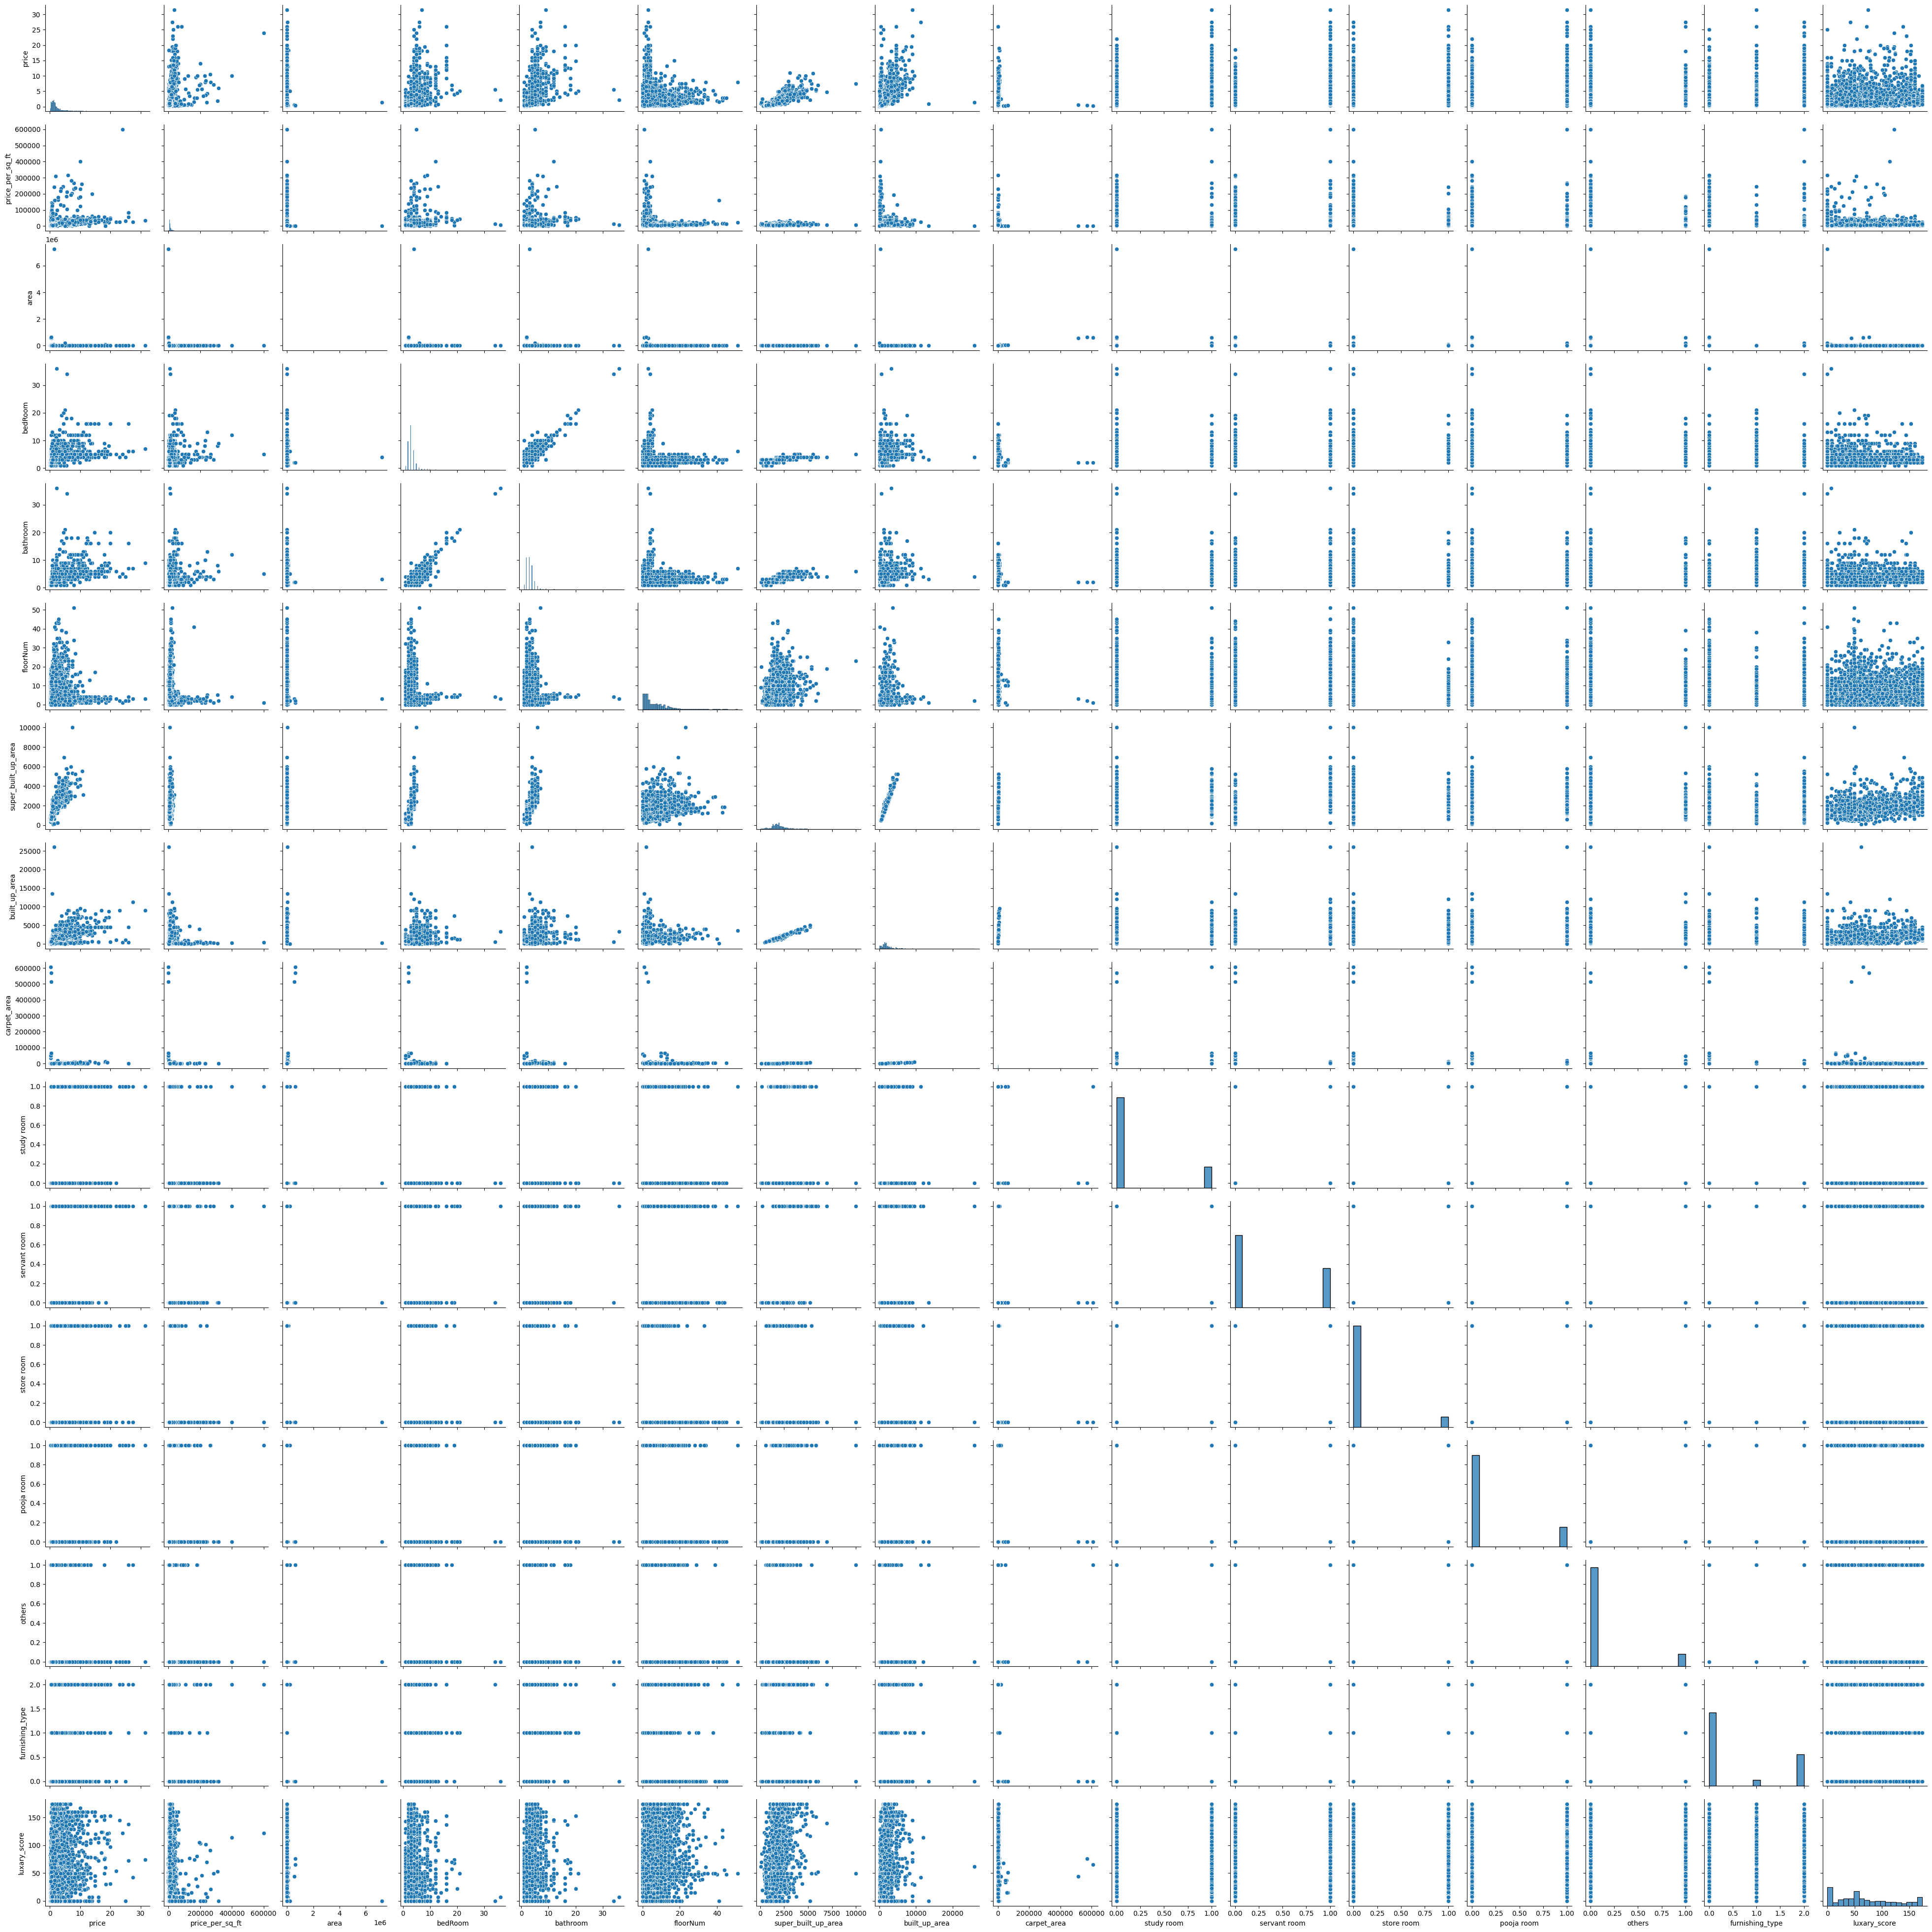

In [259]:
sns.pairplot(data)